[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI4ChemS/CHE-1147/blob/main/tutorials/tutorial_03_eda_and_rdkit.ipynb)

# Getting Started with RDKit

**RDKit** (RD stands for "Rational Drug Design") is an open-source cheminformatics toolkit for working with chemical data.

RDKit（RD 代表 “Rational Drug Design”）是一个开源化学信息学工具包，用于处理化学数据。

Key capabilities include:

- **Molecular representation:** Convert chemical names or formulas into machine-readable formats such as SMILES or RDKit Mol objects, and transform 2-D or 3-D structures into data that machine learning (ML) algorithms can process.

分子表示：将化学名称或化学式转换为机器可读格式，如 SMILES 或 RDKit Mol 对象。将二维或三维结构转换为机器学习（ML）算法可处理的数据

- **Feature engineering:** Compute molecular descriptors (like molecular weight) and generate fingerprints that encode each molecule as a fixed-length numerical vector that can be used for regression or classification tasks.

特征工程：计算分子描述符（如分子量）。生成指纹，将每个分子编码为固定长度的数值向量，可用于回归或分类任务

- **Chemical similarity:** Quantify how alike two molecules are using metrics such as the Tanimoto coefficient, enabling tasks like clustering chemical libraries, virtual screening of large databases, and property prediction.

化学相似性：使用指标（如 Tanimoto 系数）量化两个分子的相似性。可用于化学库聚类、大型数据库虚拟筛选和性质预测。

- **Pattern recognition:** Search structures for functional groups or other key motifs, and automatically identify reaction sites or core molecular scaffolds for further analysis.

模式识别：搜索分子中的功能基团或关键结构。自动识别反应位点或核心分子骨架以供进一步分析


By mastering RDKit, you'll be able to:  
- Analyze chemical datasets efficiently
- Connect molecular structure to chemical and physical properties
- Build predictive machine learning models for molecular properties

掌握 RDKit 后，你将能够，高效分析化学数据集，将分子结构与化学和物理性质关联，构建预测分子性质的机器学习模型

Further reading:
- [RDKit Documentation](https://www.rdkit.org/docs/) - Comprehensive RDKit guide
- [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html) - Practical examples and recipes
- [Greg Landrum's RDKit Blog](https://greglandrum.github.io/rdkit-blog/) - Advanced tutorials and tips


# 1. Installation

If you're working on your local machine, you can install by running:
```bash
pip install rdkit
```
or for conda:
```bash
conda install -c rdkit rdkit
```


In [ ]:
# or for Colab, uncomment:
# !pip install rdkit

In [13]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 41.2 MB/s eta 0:00:00


Water molecule: O


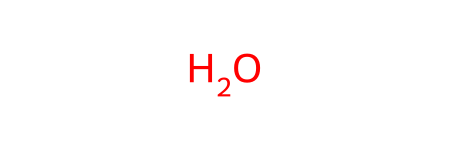

In [15]:

# Import packages
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

# Test installation by printing a simple molecule
water = Chem.MolFromSmiles('O')       #将 SMILES 字符串转换为 RDKit 的 Mol 对象（分子对象）。 #'O' 是水分子的 SMILES 表示
print(f"Water molecule: {Chem.MolToSmiles(water)}")         #把值插入到字符串中。

# Test molecule visualization
water


# 2. Molecular Representations

## SMILES (Simplified Molecular Input Line Entry System)

SMILES 将分子结构编码为紧凑的 线性文本表示，可以把二维化学结构图转换为计算机可解析的单行字符串。它表示内容包括：

SMILES encodes a molecule’s structure as a compact line notation, turning a 2-D chemical diagram into a single text string that computers can parse. It represents:
- **Atoms:** Element symbols like C (carbon), N (nitrogen), O (oxygen)

原子（Atoms）：元素符号，如 C（碳）、N（氮）、O（氧）

- **Bonds:** Single bonds implicit, double bonds (=), triple bonds (#)

键（Bonds）：单键隐式表示，双键用 =, 三键用 #

- **Rings:** Numbers mark ring closures so the string can “loop back”

环（Rings）：用数字标记环的闭合，使字符串可以“回环”

- **Branches:** Parentheses show side chains branching off the main backbone

支链（Branches）：用括号表示从主链分出的侧链

Some examples of SMILES:
- Water: `O`
- Ethanol 乙醇: `CCO`
- Benzene 苯: `c1ccccc1`
- Caffeine 咖啡因: `CN1C=NC2=C1C(=O)N(C(=O)N2C)C`


## RDKit Mol Objects

An RDKit **Mol object** is a computer-readable representation of a molecule. It stores the full molecular graphs/atoms and their chemical information.  This goes beyond a plain SMILES string, which is only a line of text. The SMILES format is ideal for storage and quick exchange, but the Mol object is the working format that lets you analyze, manipulate, and calculate properties directly in RDKit.

Mol 对象是 RDKit 中 计算机可读的分子表示。它存储完整的分子图、原子及其化学信息，远比单行 SMILES 字符串丰富。

用途区别：

SMILES：适合存储和快速传输

Mol 对象：工作格式，可用于 分析、操作和计算分子性质

In [16]:
# Create molecules from SMILES   创建了一个 Python 字典
molecules = {
    'Water': 'O',
    'Methane': 'C',
    'Ethanol': 'CCO',
    'Benzene': 'c1ccccc1',
    'Caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
}

# Convert SMILES to RDKit mol objects  # mol_objects 将用来存储 RDKit 的 Mol 对象，方便后续分析或可视化。
mol_objects = {}

#Chem.MolFromSmiles(smiles)，RDKit 函数，将 SMILES 字符串转换成 Mol 对象，Mol 对象是 计算机可读的分子表示，可以进一步分析
#molecules.items() 会返回字典的 (key, value) 对，也就是 (name, smiles)
#mol_objects[name] = mol，将生成的 Mol 对象保存到 mol_objects 字典中，键与名称相同

for name, smiles in molecules.items():
    mol = Chem.MolFromSmiles(smiles)
    mol_objects[name] = mol
    print(f"{name}: {smiles}")


Water: O
Methane: C
Ethanol: CCO
Benzene: c1ccccc1
Caffeine: CN1C=NC2=C1C(=O)N(C(=O)N2C)C


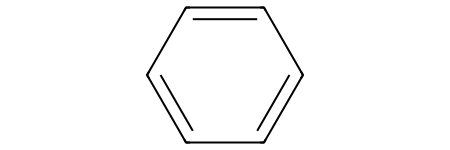

In [17]:
# Display the benzene molecule  画出苯环的样子
mol_objects['Benzene']

In [ ]:
# Check some basic molecular properties 从之前创建的 mol_objects 字典中获取苯分子的 Mol 对象。
benzene = mol_objects['Benzene']

print(f"Number of atoms: {benzene.GetNumAtoms()}")              #找到苯分子中原子的数量。
print(f"Number of bonds: {benzene.GetNumBonds()}")              #找到苯分子中化学键的数量
print(f"Molecular formula: {Chem.rdMolDescriptors.CalcMolFormula(benzene)}")    #找到苯分子中的化学分子式
print(f"Molecular weight: {Descriptors.MolWt(benzene):.2f} g/mol")         #找到苯分子中的分子量  #:.2f 用于保留两位小数。


Number of atoms: 6
Number of bonds: 6
Molecular formula: C6H6
Molecular weight: 78.11 g/mol


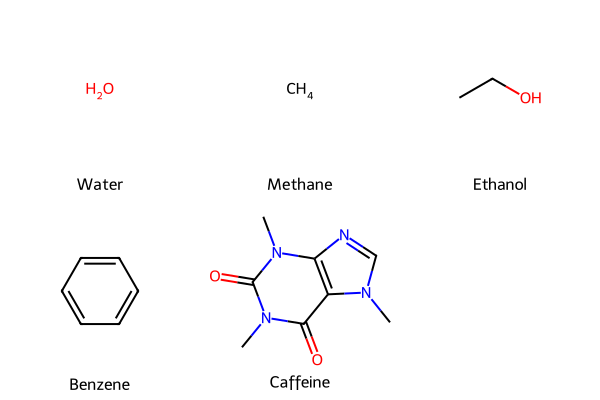

In [ ]:
# Visualize multiple molecules in a grid using MolsToGridImage
#mol_objects.values() 返回字典中所有 Mol 对象（即所有分子）。

#list(...) 将其转换为列表，方便传入绘图函数。

#mol_objects.keys() 返回分子名称（Water, Methane, Ethanol…），转换为列表后用于图例。

mol_list = list(mol_objects.values())

#mol_list：要显示的分子对象列表
#molsPerRow=3：每行显示 3 个分子，超过的分子会换行
#legends=names,   # 每个分子下面显示名称
#subImgSize=(200, 200)  # 每个子图的大小 (宽, 高) 像素

Draw.MolsToGridImage(mol_list, molsPerRow=3, legends=names, subImgSize=(200, 200))


## SMILES Canonicalization规范化

A single molecule can be written with multiple valid SMILES strings.  
*Canonical SMILES* provide a **unique, standardized representation**, ensuring that the same molecule is always encoded the same way.

一个分子可以用多个有效的 SMILES 字符串表示。规范化（Canonical）SMILES 提供唯一且标准化的表示方式，确保同一分子始终以相同的方式编码。

Examples of non-canonical SMILES for acetic acid:

乙酸（acetic acid）的非规范 SMILES 示例：
- `CC(=O)O`
- `C(C(=O)O)`
- `OC(=O)C`

All represent the same molecule but look different!


In [ ]:
# Different SMILES for the same molecule (acetic acid)
acetic_acid_variants = [
    'CC(=O)O',
    'C(C(=O)O)',
    'OC(=O)C'
]

# Convert to mol objects and back to canonical SMILES
canonical_smiles = []
for smiles in acetic_acid_variants:
    mol = Chem.MolFromSmiles(smiles)  #Chem.MolFromSmiles(smiles)：把 SMILES 文本解析为 RDKit 的分子对象

    canonical = Chem.MolToSmiles(mol)  # This canonicalizes
    canonical_smiles.append(canonical) # Chem.MolToSmiles(mol)：输出该分子的规范化 SMILES，即唯一的、标准化的字符串。
    print(f"Original: {smiles}")     #f"…{smiles}…"：这是 f-string（格式化字符串），用 f 前缀告诉 Python 这是一个可以内嵌变量的字符串。
                                      # {smiles} 会被变量 smiles 的当前值替换
    print(f"Canonical: {canonical}")       #{canonical} 会被变量 canonical 的值替换，比如 "CC(=O)O"。
    print()                        #这里 print 没有参数，作用是打印一个空行，这样做是为了让不同分子的输出之间有视觉上的间隔，更易读。


Original: CC(=O)O
Canonical: CC(=O)O

Original: C(C(=O)O)
Canonical: CC(=O)O

Original: OC(=O)C
Canonical: CC(=O)O



We can control whether stereochemistry and isotopic information are written into the SMILES string. RDKit outputs only the connectivity (which atoms are bonded). By setting `isomericSmiles=True` the SMILES will preserve:

我们可以控制在 SMILES 字符串中是否写入立体化学和同位素信息。
默认情况下，RDKit 仅输出分子的连接关系（哪些原子彼此键合）。
通过将 isomericSmiles=True，SMILES 将保留以下内容：


- Stereocenters (`@`,`@@`) and double-bond cis/trans (`/`, `\`)      立体中心（@、@@）以及双键的顺反构型（/、\）

- Isotopes (e.g. `[13C]`)      同位素信息（例如 [13C]）


The function below allows changing between these modes using the `isomeric` flag:

下面的函数可以通过 isomeric 参数在这些模式之间切换。

In [ ]:
# A function to canonicalize isomeric SMILES
#定义函数 canonicalize_smiles，接受两个参数：smiles：字符串类型，输入的 SMILES 表达式。isomeric: bool = True：布尔类型参数，默认值为 True。
#当为 True 时输出的 SMILES 会保留立体化学（如手性中心 @、@@）和同位素信息（如 [13C]）。当为 False 时输出只包含原子的连接关系

def canonicalize_smiles(smiles, isomeric:bool=True):
    """
    Convert any SMILES to its canonical form.     #函数将任意 SMILES 转换为规范化形式。

    Args:
        smiles (str): Input SMILES string   #Args: 解释参数 smiles 的类型与用途。

    Returns:
        str: Canonical SMILES                  #Returns: 说明返回一个标准化后的 SMILES 字符串。
    """
    mol = Chem.MolFromSmiles(smiles)                 #调用 RDKit 中的 Chem.MolFromSmiles 方法，将输入的 SMILES 字符串解析为一个 Mol 对象（分子对象）。
    if mol is None:
        return None  # Invalid SMILES
   #检查解析结果是否为 None。这一步是为了处理异常输入，例如错误的 SMILES 格式。

    return Chem.MolToSmiles(mol, isomericSmiles=isomeric)
#将上一步生成的 Mol 对象转换回 SMILES 字符串，并且规范化。Chem.MolToSmiles 会自动生成唯一的、标准顺序的 SMILES。

#参数 isomericSmiles=isomeric 控制是否包含立体信息和同位素信息：True → 包含立体化学标记与同位素。False → 只保留基本的连接关系。

# Test with stereochemistry 立体化学 (fluoroethanol enantiomers 氟代乙醇)
#说明接下来要做的测试与立体化学 (stereochemistry) 有关。

test_smiles = ["C[C@H](O)F", "C[C@@H](O)F"]            #这一行定义了一个列表 test_smiles，包含两个分子的 SMILES 表示。C[C@H](O)F 和 C[C@@H](O)F 是氟代乙醇的两个手性异构体（enantiomers）。@ 和 @@ 表示手性中心的立体化学方向（R/S 配置）。

for s in test_smiles:           #启动一个循环，对列表中的每个 SMILES 字符串 s 进行迭代处理。
    print(f"Original: {s}")           #打印原始的 SMILES 字符串。 例如，第一次循环会打印 Original: C[C@H](O)F。
    print("  Non-isomeric :", canonicalize_smiles(s, isomeric=False))      #调用 canonicalize_smiles 函数，将 SMILES 转换为**规范化（canonical）**的 SMILES 字符串。参数 isomeric=False 表示不考虑立体化学信息（即忽略手性中心），只关注分子的原子和连接关系。例如，两种手性异构体会被视为相同分子。
    print("  Isomeric     :", canonicalize_smiles(s, isomeric=True))     #同样调用 canonicalize_smiles，但这次 isomeric=True，表示保留立体化学信息。这样输出的 SMILES 会区分 R/S 异构体。
    print()         #打印一个空行



Original: C[C@H](O)F
  Non-isomeric : CC(O)F
  Isomeric     : C[C@H](O)F

Original: C[C@@H](O)F
  Non-isomeric : CC(O)F
  Isomeric     : C[C@@H](O)F



### Mini Exercise 1

1. Create mol objects for these important chemical engineering molecules:
   - Ethylene: `C=C`
   - Propylene: `CC=C`
   - Toluene: `Cc1ccccc1`

2. Calculate their molecular weights and number of atoms.

3. Canonicalize these SMILES and verify they give the same result:
   - Toluene: `Cc1ccccc1` vs `c1ccc(C)cc1`


In [ ]:
# Exercise 1 solution space


# 3. Molecular Descriptors

**Molecular descriptors** are numerical features that quantify molecular properties. They convert molecular structure into vectors that ML algorithms can use.

分子描述符（Molecular descriptors） 是用来量化分子性质的数值特征。它们将分子结构转换为机器学习算法可用的向量。

Some descriptor categories include:
- **Constitutional:** MW, atom counts, bond counts

组成类（Constitutional）：分子量（MW）、原子数、键数
- **Topological:** Connectivity indices, molecular complexity

拓扑类（Topological）：连通性指数、分子复杂度
- **Physicochemical:** LogP, TPSA, solubility parameters

理化类（Physicochemical）：LogP、TPSA（拓扑极性表面积）、溶解度参数
- **Electronic:** Partial charges, HOMO-LUMO gaps


电子类（Electronic）：部分电荷、HOMO-LUMO 能隙


In [11]:


from rdkit import Chem
from rdkit.Chem import Descriptors


# Calculate important descriptors for benzene
benzene = Chem.MolFromSmiles('c1ccccc1')        #将苯的 SMILES 表示转换为 RDKit 可操作的分子对象。为计算苯的各种分子描述符（如分子量、LogP、TPSA 等）做准备。

# Constitutional descriptors
mw = Descriptors.MolWt(benzene)         #调用 RDKit 的 Descriptors.MolWt 函数计算苯的分子量（Molecular Weight, MW）
heavy_atoms = benzene.GetNumHeavyAtoms()         #计算重原子数量
h_bond_donors = Descriptors.NumHDonors(benzene)       #计算分子的氢键供体数量（H-bond donors），即能提供氢原子形成氢键的原子数量。
h_bond_acceptors = Descriptors.NumHAcceptors(benzene)         #计算分子的氢键受体数量（H-bond acceptors），即能接受氢键的原子数量（通常是氧、氮等带孤对电子的原子）。

# Physicochemical descriptors
logp = Descriptors.MolLogP(benzene)          #LogP 是分子在油水分配（octanol-water partition）中的分配系数的对数，用于衡量分子的疏水性/亲水性。
tpsa = Descriptors.TPSA(benzene)             #计算苯的 拓扑极性表面积
rotatable_bonds = Descriptors.NumRotatableBonds(benzene)      #计算苯的 可旋转键数量。

# Structural descriptors
aromatic_rings = Descriptors.NumAromaticRings(benzene)   #算苯分子中芳香环的数量
rings = Descriptors.RingCount(benzene)     #计算苯分子中所有环的数量

print("Benzene Molecular Descriptors:")
print(f"Molecular Weight: {mw:.2f} g/mol")  #f：这是 f-string（格式化字符串） 的语法，允许在字符串中直接嵌入变量值。字符串中的 {...} 会被替换为变量的实际值。
                                            #" g/mol"字符串后缀，表示单位“克/摩尔”。
print(f"Heavy Atoms: {heavy_atoms}")
print(f"H-bond Donors: {h_bond_donors}")
print(f"H-bond Acceptors: {h_bond_acceptors}")
print(f"LogP: {logp:.2f}")           #:.2f 表示格式化为浮点数，保留 2 位小数。
print(f"TPSA: {tpsa:.2f} Ų")
print(f"Rotatable Bonds: {rotatable_bonds}")
print(f"Aromatic Rings: {aromatic_rings}")
print(f"Total Rings: {rings}")


ModuleNotFoundError: No module named 'rdkit'

# 4. Molecular Fingerprints & Similarity

**Molecular fingerprints** encode molecular structure as binary vectors (bit strings). Each bit represents the presence/absence of a specific structural feature.

分子指纹（Molecular fingerprints） 将分子结构编码为二进制向量（比特串）。每一位表示某个特定结构特征的存在或不存在。

A common approach is the **Morgan fingerprint**, which encodes circular substructures around each atom. The **radius** controls how many bonds the algorithm explores outward from each atom, while the **length** determines the size of the bit string (typically 1,024 or 2,048 bits). By capturing local chemical environments in this way, Morgan fingerprints provide a consistent numerical description of any molecule.



一种常用的方法是 Morgan 指纹，它对每个原子周围的环状子结构进行编码。

半径（radius） 控制算法从每个原子向外探索多少条键。

长度（length） 决定比特串的大小（通常为 1,024 或 2,048 位）。

通过这种方式捕捉局部化学环境，Morgan 指纹为任意分子提供了一种一致的数值描述。

In [ ]:
from rdkit.Chem import rdFingerprintGenerator      #从 RDKit 的 Chem 模块中导入 rdFingerprintGenerator 子模块。这是 RDKit 中生成各种分子指纹（fingerprints）的工具包。

# Create Morgan fingerprint generator
# radius=2 means we look 2 bonds away from each atom      #radius=2：计算指纹时，以每个原子为中心向外扩展 2 条化学键的范围，用来捕捉局部结构。
# fpSize=2048 means 2048-bit fingerprint                   #fpSize=2048：生成的指纹是一个 2048 位的二进制向量（bit string）。
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)       #morgan_gen 变量中存放着一个可用于生成分子 Morgan 指纹的对象。

# Generate fingerprint for benzene
benzene = Chem.MolFromSmiles('c1ccccc1')        #使用 RDKit 的 Chem.MolFromSmiles 将苯的 SMILES 表达式 'c1ccccc1' 转换为 RDKit 的 分子对象。这个对象包含了苯的所有原子和键的信息。
benzene_fp = morgan_gen.GetFingerprint(benzene)   #调用刚才创建的 Morgan 生成器的 GetFingerprint 方法，输入：苯的分子对象 benzene，输出：苯的 Morgan 指纹，类型为 ExplicitBitVect（一个稀疏的二进制向量对象）。

print(f"Fingerprint length: {benzene_fp.GetNumBits()}")    #GetNumBits()：返回指纹的总长度。
print(f"Number of bits set: {benzene_fp.GetNumOnBits()}")          #GetNumOnBits()：返回指纹中值为 1 的比特数量，即表示苯分子中实际存在的局部结构特征数。

# Convert to list to see the first few bits
fp_array = benzene_fp.ToList()                 #ToList()：把 ExplicitBitVect 对象转成 Python 普通列表，每个元素是 0 或 1方便后续查看或与其他 Python 库（如 NumPy、pandas）配合使用。
print(f"First 20 bits: {fp_array[:20]}")       #打印指纹列表的前 20 个元素。


Fingerprint length: 2048
Number of bits set: 3
First 20 bits: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


The **Tanimoto coefficient** is then used to compare these fingerprints. This makes it the standard metric for assessing molecular similarity once Morgan fingerprints have been generated. It measures the fraction of shared bits between two molecules relative to the total bits set in either one, giving a score from 0 (no common features) to 1 (identical fingerprints).


Tanimoto 系数随后被用来比较这些指纹。
因此，它成为在生成 Morgan 指纹后评估分子相似性的标准度量。
它衡量两个分子指纹中**共享比特**占双方**总置位比特**的比例，
得分范围从 **0**（没有共同特征）到 **1**（指纹完全相同）。


In [3]:

from rdkit.DataStructs import TanimotoSimilarity                 #从 rdkit.DataStructs 模块导入 TanimotoSimilarity 函数

# Create molecules for similarity comparison
#建立一个 Python 字典 molecules_sim，用于存放要比较的分子名称及其 SMILES 表示。
          #键（key）：分子名称（如 'Caffeine'、'Benzene'）。
          #值（value）：对应分子的 SMILES 字符串，RDKit 可以根据这些字符串生成分子对象和指纹。



molecules_sim = {
    'Caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',                            #Caffeine（咖啡因）
    'Theobromine': 'CN1C=NC2=C1C(=O)NC(=O)N2C',    # Similar to caffeine   #Theobromine（可可碱）
    'Theophylline': 'CN1C2=C(C(=O)N(C1=O)C)NC=N2', # Similar to caffeine   #Theophylline（茶碱）
    'Benzene': 'c1ccccc1',                         # Different structure   #Benzene（苯）
    'Toluene': 'Cc1ccccc1'                         # Different structure   #Toluene（甲苯）
}

# Generate fingerprints
fingerprints = {}         #创建一个空字典 fingerprints。 这个字典将用来保存每个分子的名字和它对应的 Morgan 指纹对象。

for name, smiles in molecules_sim.items():       #name：分子名称（如 "Caffeine"）。smiles：该分子的 SMILES 字符串（如 "CN1C=NC2..."）。.items() 会同时返回键和值。
    mol = Chem.MolFromSmiles(smiles)             #把当前分子的 SMILES 字符串转化为 RDKit 分子对象 mol。这个对象包含了原子、键、环等结构信息，是后续计算指纹的输入。
    fp = morgan_gen.GetFingerprint(mol)           #使用之前创建的 Morgan 指纹生成器 morgan_gen，对分子对象 mol 生成它的 Morgan 指纹（一个 ExplicitBitVect 类型的稀疏二进制向量）。
    fingerprints[name] = fp                  #将分子名称作为字典键 name，指纹对象 fp 作为值，存入 fingerprints 字典。

# Build similarity matrix as DataFrame
names = list(molecules_sim.keys())       #从字典 molecules_sim 中取出所有的键（分子名称），并转换成一个列表

matrix = [
    [TanimotoSimilarity(fingerprints[a], fingerprints[b]) for b in names]    #这是一个双层列表推导式，用来生成二维相似度矩阵。

                                                                              #外层 for a in names：依次以分子 a 作为“行”。

                                                                              #内层 for b in names：依次以分子 b 作为“列”。
    for a in names                                                            #计算分子 a 的指纹与分子 b 的指纹之间的 Tanimoto 相似系数（0~1 之间的浮点数）。1 表示两分子的指纹完全相同；0 表示完全不相似。
]

similarity_df = pd.DataFrame(matrix, index=names, columns=names)       #使用 pandas 的 DataFrame 将二维列表 matrix 转换成带行列标签的表格，index=names：行名设为分子名称列表。columns=names：列名也设为分子名称列表。
similarity_df

ModuleNotFoundError: No module named 'rdkit'

### Mini Exercise 2

1. Calculate Morgan fingerprints for these solvent molecules:
   - Water: `O`
   - Methanol: `CO`
   - Ethanol: `CCO`
   - Propanol: `CCCO`

2. Which alcohol (methanol, ethanol, propanol) is most similar to ethanol?

3. Compare the similarity of water to each alcohol. What do you observe about the trend?


In [ ]:
# Exercise 2 solution space


# 5. Working with Datasets

Real-world cheminformatics projects often involve **large collections of molecules**, and RDKit works smoothly with **pandas** to handle them with DataFrames.

In this example we will test RDKit functions over the **ClinTox dataset**, which contains **1,480 drug-like molecules** represented by SMILES strings. Each entry (row) is tagged to indicate whether the compound is an FDA-approved drug or one that failed clinical trials due to toxicity.


## Introduction to Pandas

**Pandas** (Python Data Analysis Library) is a library for data manipulation and analysis in Python.

Key capabilities include:

- **DataFrames:** Two-dimensional labeled data structures (like spreadsheets) that can store different data types in columns

- **Data loading:** Read data from various formats (CSV, Excel, JSON, databases)

- **Data manipulation:** Filter, sort, group, remove and transform data, allowing you to subset molecular libraries, calculate statistics, and prepare whole datasets for machine learning

## Essential Pandas Functions

Before diving into our dataset, let's understand the key pandas functions we'll use:

- `pd.read_csv()`:
This function loads data from CSV files into a DataFrame. Datasets are commonly stored in CSV format, with each row representing a datapoint (e.g. a molecule) and columns contain descriptors (e.g. SMILES, chemical properties)

- `DataFrame.shape`:
Returns the dimensions of your dataset as (rows, columns). This is a checkpoint to understand whether you're working with hundreds or thousands of datapoints

- `DataFrame.head()`:
Displays the first few rows (default 5) of your dataset. This gives you a quick preview of the data structure, column names, and data types

In [ ]:
# Load dataset using pd.read_csv()
# This function reads the CSV file from a URL and creates a DataFrame
url = "https://raw.githubusercontent.com/AI4ChemS/CHE-1147/main/data/tutorial_03_clintox.csv"
df = pd.read_csv(url)

# Check dataset dimensions using .shape()
print(f"Dataset shape: {df.shape}")

# Show the first few rows with .head()
print("First few rows:")
df.head()

Dataset shape: (1480, 3)
First few rows:


smiles  FDA_APPROVED  CT_TOX
0             C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC             1       0
1  [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...             1       0
2  [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...             1       0
3  [H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...             1       0
4  [H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...             1       0

As we're interested in getting molecular features using the SMILES , we first canonicalize them to ensure a unique, standardized representation per molecule:

In [ ]:
# Apply the 'canonicalize_smiles' function to the column ['smiles'] and store in new column ['canonical_smiles']
df['canonical_smiles'] = df['smiles'].apply(canonicalize_smiles)

# Find the SMILES thst changed
# We can create a subset a DataFrame with the entries that are different (!=)
changed = df[df['smiles'] != df['canonical_smiles']]

print(f"Total changed: {len(changed)}")

# A few examples
for idx, (orig, canon) in changed[['smiles', 'canonical_smiles']].head(3).iterrows():
    print(f"Original: {orig}  ->  Canonical: {canon}")

Total changed: 1430
Original: C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC  ->  Canonical: COCCOC(=O)NCCCC[C@@H](C=O)NC(=O)OCCOC
Original: [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)Cl)Cl)Cl)Cl)Cl  ->  Canonical: Cl[C@H]1[C@H](Cl)[C@@H](Cl)[C@@H](Cl)[C@H](Cl)[C@H]1Cl
Original: [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)[O-])O)O  ->  Canonical: O=C([O-])[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C(=O)[O-]


We can now check the **uniqueness of molecules** before and after canonicalization. Different SMILES strings may represent the same molecule, so counting unique values in both columns helps us see how many entries collapse into a single standardized representation.  

This gives us an idea of dataset redundancy and possible duplicates that should be handled before further analysis or model training. However, duplicates should be handled carefully, since they may reflect valuable datapoints. For instance, the same molecule annotated with different outcomes.

In [ ]:
# Count the unique values with .nunique()
unique_smiles = df['smiles'].nunique()
unique_canonical = df['canonical_smiles'].nunique()

print(f'Unique SMILES: {unique_smiles}')
print(f'Unique canonical SMILES: {unique_canonical}')

Unique SMILES: 1480
Unique canonical SMILES: 1461


Now our dataset is ready for feature extraction. We convert the canonical SMILES strings into RDKit molecule objects.

`PandasTools.AddMoleculeColumnToFrame()` is an RDKit function that creates RDKit mol objects from SMILES strings in a specified column, and adds a new column to the DataFrame containing these mol objects

In [ ]:
from rdkit.Chem import PandasTools

# Add a column called 'molecule' with mol objects
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='canonical_smiles', molCol='molecule')

df.head()


smiles  FDA_APPROVED  CT_TOX  \
0             C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC             1       0   
1  [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...             1       0   
2  [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...             1       0   
3  [H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...             1       0   
4  [H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...             1       0   

                                    canonical_smiles  \
0              COCCOC(=O)NCCCC[C@@H](C=O)NC(=O)OCCOC   
1  Cl[C@H]1[C@H](Cl)[C@@H](Cl)[C@@H](Cl)[C@H](Cl)...   
2  O=C([O-])[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C(...   
3  [H]/[NH+]=C(\N)C1=CC(=O)/C(=C\C=c2ccc(=C(N)[NH...   
4  [H]/[NH+]=C(\N)c1ccc(OCCCCCOc2ccc(/C(N)=[NH+]/...   

                                            molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x000001E5029...  
1  <rdkit.Chem.rdchem.Mol object at 0x000001E5029...  
2  <rdkit.Chem.rdchem.Mol object at 0x000001E5039...  
3  <rdkit.Chem.rdchem.Mol object at 0x000001E5039...  
4  <rdkit.Chem.rdchem.Mol object at 0x000001E5039...

We can also check how many molecules were successfully created using pandas. We could do this by counting how many rows in the 'molecule' column are not null, with the functions:
- `.notna()` returns boolean mask for non-null values
- `.sum()` counts True values (successful molecule creations)
- `len()` gives total number of rows in the DataFrame

In [ ]:
non_null_mask = df['molecule'].notna()
num_created = non_null_mask.sum()
total_rows = len(df)

print(f"Molecules created: {num_created}/{total_rows}")


Molecules created: 1480/1480


In [ ]:
# Define a function to calculate key molecular descriptors
def calculate_key_descriptors(mol):
    """Calculate key molecular descriptors for a molecule."""

    descriptors = {
        'MW': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'TPSA': Descriptors.TPSA(mol),
        'HBD': Descriptors.NumHDonors(mol),
        'HBA': Descriptors.NumHAcceptors(mol),
        'RotBonds': Descriptors.NumRotatableBonds(mol)
    }

    return descriptors

# Apply the function to the molecules in the DataFrame
descriptor_data = []
for idx, mol in df['molecule'].items():
    desc = calculate_key_descriptors(mol)
    descriptor_data.append(desc)

# Create descriptor DataFrame with pd.DataFrame()
# We use the same index as the original DataFrame to maintain row alignment
descriptor_df = pd.DataFrame(descriptor_data, index=df.index)

# Combine with the original molecules DataFrame
df_with_descriptors = pd.concat([df, descriptor_df], axis=1)

# Check the new dimensions - we should have the same number of rows but more columns
print(f"Dataset shape: {df_with_descriptors.shape}")
df_with_descriptors.head()


Dataset shape: (1480, 11)


smiles  FDA_APPROVED  CT_TOX  \
0             C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC             1       0   
1  [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...             1       0   
2  [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...             1       0   
3  [H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...             1       0   
4  [H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...             1       0   

                                    canonical_smiles  \
0              COCCOC(=O)NCCCC[C@@H](C=O)NC(=O)OCCOC   
1  Cl[C@H]1[C@H](Cl)[C@@H](Cl)[C@@H](Cl)[C@H](Cl)...   
2  O=C([O-])[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C(...   
3  [H]/[NH+]=C(\N)C1=CC(=O)/C(=C\C=c2ccc(=C(N)[NH...   
4  [H]/[NH+]=C(\N)c1ccc(OCCCCCOc2ccc(/C(N)=[NH+]/...   

                                            molecule       MW    LogP    TPSA  \
0  <rdkit.Chem.rdchem.Mol object at 0x000001E5029...  334.369  0.4694  112.19   
1  <rdkit.Chem.rdchem.Mol object at 0x000001E5029...  290.832  3.6444    0.00   
2  <rdkit.Chem.rdchem.Mol object at 0x000001E5039...  208.122 -6.0702  161.18   
3  <rdkit.Chem.rdchem.Mol object at 0x000001E5039...  282.347 -3.1586  122.34   
4  <rdkit.Chem.rdchem.Mol object at 0x000001E5039...  342.443 -0.7565  121.68   

   HBD  HBA  RotBonds  
0    2    7        13  
1    0    0         0  
2    4    8         5  
3    4    2         2  
4    4    2        10

# 6. Exploratory Data Analysis (EDA)

**Exploratory Data Analysis** is the critical first step in any data science project, especially in cheminformatics where understanding the chemical space and data quality is essential before building predictive models.

## Introduction to EDA

EDA is the process of examining and understanding your dataset through:

- **Data overview:** Understanding the structure, size, and types of variables a your chemical dataset
- **Quality assessment:** Identifying missing values, outliers, and potential data quality issues that could affect model performance
- **Distribution analysis:** Examining how molecular properties are distributed across your chemical library
- **Relationship exploration:** Discovering correlations between molecular descriptors and target properties
- **Pattern recognition:** Identifying clusters, trends, and anomalies in chemical space

By mastering exploratory data analysis (EDA), you can make informed decisions about preprocessing and feature selection, spot potential issues before they affect model training, and clearly communicate your results!

## Essential Pandas Functions for EDA

### Dataset Overview Functions

These functions provide the foundation for understanding your dataset:

- `DataFrame.info()`:
Provides comprehensive metadata about your dataset including column types, non-null counts, and memory usage. Critical for understanding data completeness and identifying columns that need attention.

- `DataFrame.describe()`:
Generates statistical summaries (mean, std, min, max, quartiles) for the columns. Helps identify the range and distribution of molecular properties in your dataset.


In [ ]:
# Import additional libraries for visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style for better visualizations
plt.style.use("default")
sns.set_palette("husl")

In [ ]:
# Check general composition with .info()
df_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   smiles            1480 non-null   object 
 1   FDA_APPROVED      1480 non-null   int64  
 2   CT_TOX            1480 non-null   int64  
 3   canonical_smiles  1480 non-null   object 
 4   molecule          1480 non-null   object 
 5   MW                1480 non-null   float64
 6   LogP              1480 non-null   float64
 7   TPSA              1480 non-null   float64
 8   HBD               1480 non-null   int64  
 9   HBA               1480 non-null   int64  
 10  RotBonds          1480 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 127.3+ KB


In [ ]:
# Check column statistics with .describe()
df_with_descriptors.describe()

FDA_APPROVED       CT_TOX           MW         LogP         TPSA  \
count   1480.000000  1480.000000  1480.000000  1480.000000  1480.000000   
mean       0.936486     0.075676   384.491368     1.301971    96.152284   
std        0.243967     0.264568   232.125145     3.150286    90.098806   
min        0.000000     0.000000    27.026000   -19.396500     0.000000   
25%        1.000000     0.000000   254.260250    -0.132525    44.900000   
50%        1.000000     0.000000   336.464000     1.615470    75.625000   
75%        1.000000     0.000000   441.706250     3.147660   113.342500   
max        1.000000     1.000000  1882.332000    12.605800   833.780000   

               HBD          HBA     RotBonds  
count  1480.000000  1480.000000  1480.000000  
mean      2.241216     5.156757     5.732432  
std       2.866996     4.382153     5.794663  
min       0.000000     0.000000     0.000000  
25%       1.000000     2.000000     2.000000  
50%       2.000000     4.000000     4.000000  
75%       3.000000     6.250000     7.000000  
max      25.000000    51.000000    53.000000

### Categorical Data Analysis

For chemical datasets, categorical variables often include compound classes, activity labels, or experimental conditions.

- `DataFrame.value_counts()`:
Counts unique values in categorical columns. Essential for understanding class distributions.

- `DataFrame.unique()` and `DataFrame.nunique()`:
    - `unique()` returns array of unique values
    - `nunique()` returns count of unique values
    - Useful for understanding diversity and categorical variable complexity


In [ ]:
# Analyze the FDA_APPROVED column using .value_counts()
print("FDA Approval Status Distribution:")
fda_counts = df_with_descriptors['FDA_APPROVED'].value_counts()
print(fda_counts)

# Calculate percentages
fda_percentages = df_with_descriptors['FDA_APPROVED'].value_counts(normalize=True) * 100
print("\nFDA Approval Status (Percentages):")
print(fda_percentages.round(1))

# Check unique values
unique = df_with_descriptors['FDA_APPROVED'].unique()
n_unique = df_with_descriptors['FDA_APPROVED'].nunique()
print(f"\nUnique values: {unique}")
print(f"\nNumber of unique values: {n_unique}")


FDA Approval Status Distribution:
FDA_APPROVED
1    1386
0      94
Name: count, dtype: int64

FDA Approval Status (Percentages):
FDA_APPROVED
1    93.6
0     6.4
Name: proportion, dtype: float64

Unique values: [1 0]

Number of unique values: 2


## Data Visualization

Visualization is essential for understanding patterns, distributions, and relationships in chemical data that might not be apparent from summary statistics alone.

Let's visualize the data distribution of the molecular descriptors:

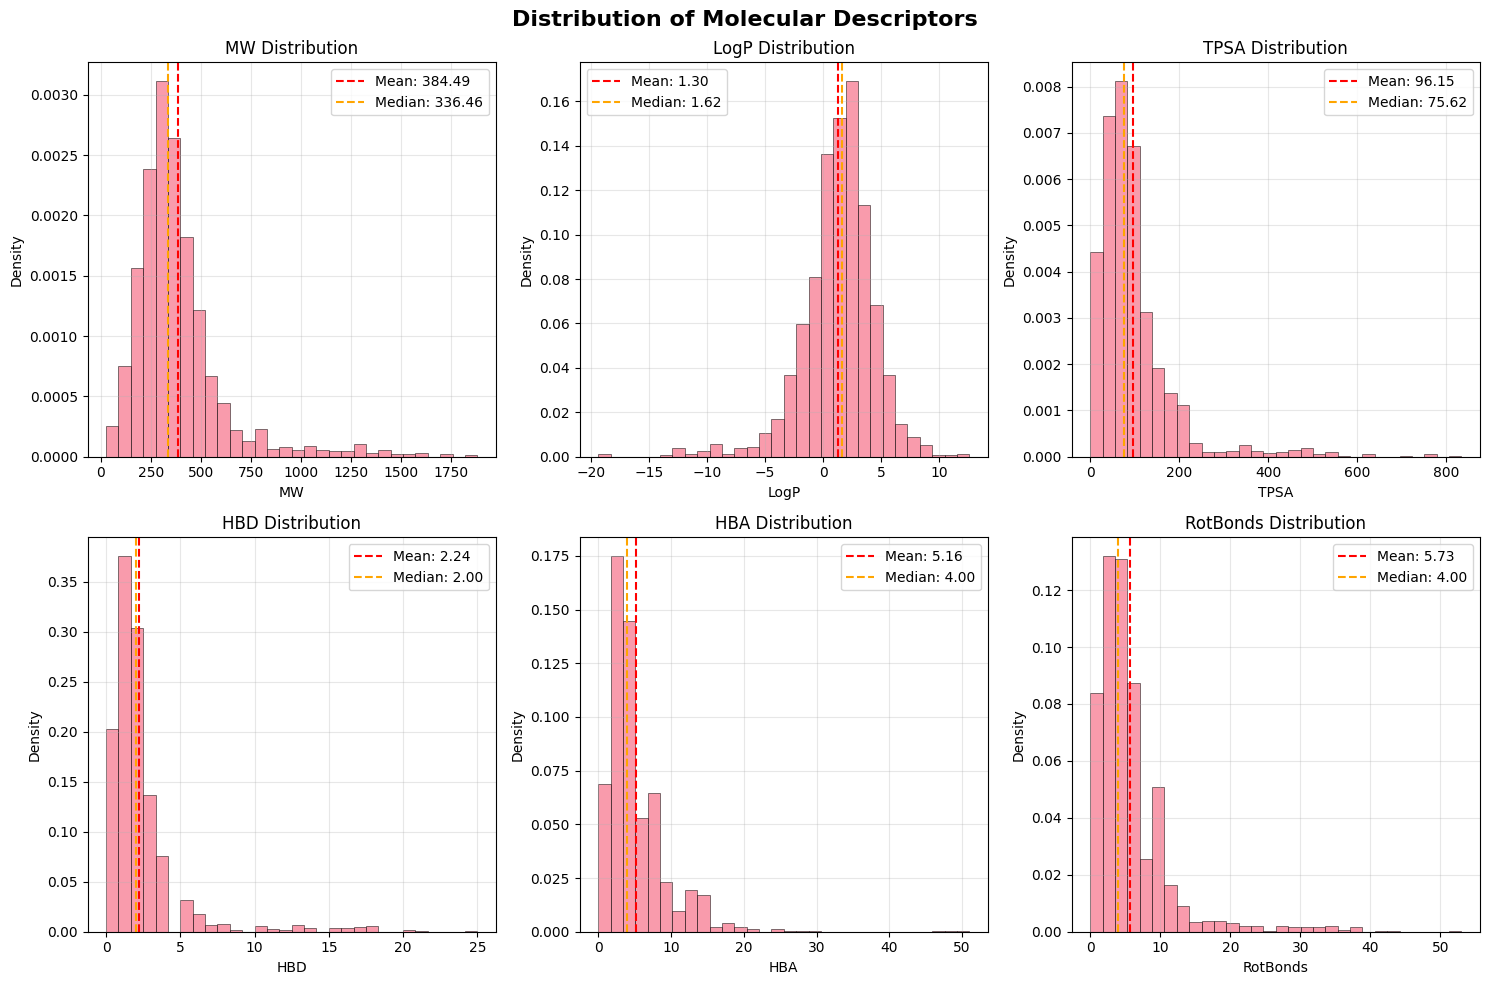

In [ ]:
# Create visualizations for molecular descriptors
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Molecular Descriptors', fontsize=16, fontweight='bold')

# Define descriptors to plot
descriptors_to_plot = ['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds']

for i, descriptor in enumerate(descriptors_to_plot):
    row = i // 3
    col = i % 3

    # Create histogram with density curve
    axes[row, col].hist(df_with_descriptors[descriptor], bins=30, alpha=0.7,
                       density=True, edgecolor='black', linewidth=0.5)

    # Add statistical information
    mean_val = df_with_descriptors[descriptor].mean()
    median_val = df_with_descriptors[descriptor].median()
    axes[row, col].axvline(mean_val, color='red', linestyle='--',
                          label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='orange', linestyle='--',
                          label=f'Median: {median_val:.2f}')

    axes[row, col].set_title(f'{descriptor} Distribution')
    axes[row, col].set_xlabel(descriptor)
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Correlation Analysis

`DataFrame.corr()` is a useful function for this, it calculates pairwise correlation coefficients between numerical columns. This is essential for understanding which descriptors are related and might provide redundant information.


Correlation Matrix for Molecular Descriptors:
             MW   LogP   TPSA    HBD    HBA  RotBonds
MW        1.000 -0.030  0.791  0.688  0.764     0.745
LogP     -0.030  1.000 -0.527 -0.498 -0.381    -0.101
TPSA      0.791 -0.527  1.000  0.850  0.899     0.655
HBD       0.688 -0.498  0.850  1.000  0.637     0.582
HBA       0.764 -0.381  0.899  0.637  1.000     0.581
RotBonds  0.745 -0.101  0.655  0.582  0.581     1.000


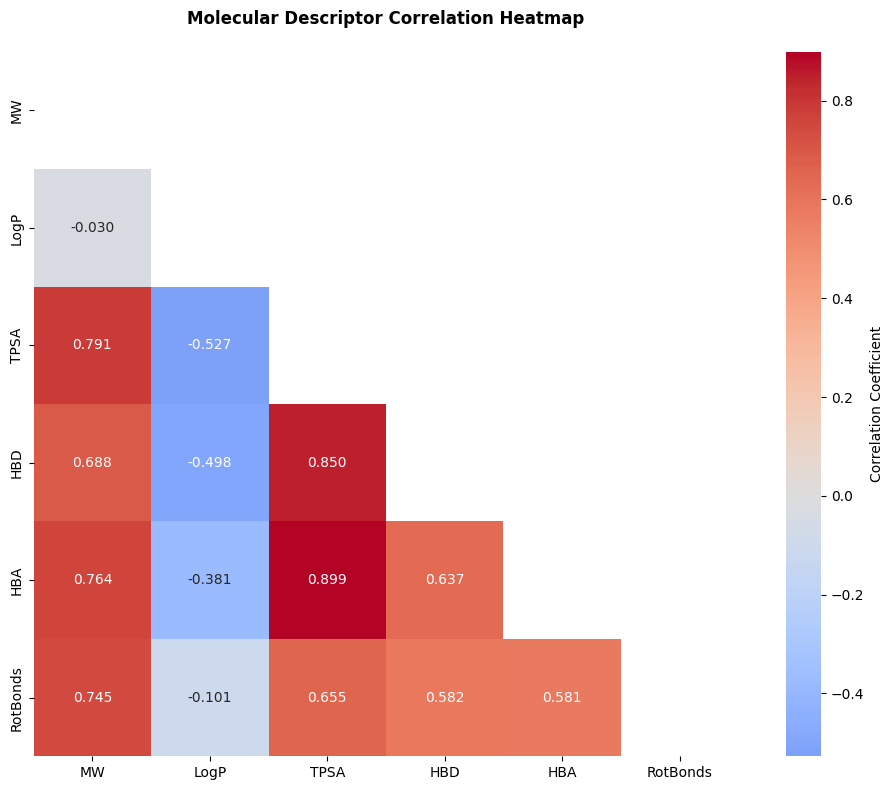

In [ ]:
# Calculate correlation matrix for molecular descriptors
descriptor_cols = ['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds']

# Calculate correlation matrix using .corr()
correlation_matrix = df_with_descriptors[descriptor_cols].corr()

# Display correlation matrix
print("Correlation Matrix for Molecular Descriptors:")
print(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(10, 8))

# Use seaborn for a more informative heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Molecular Descriptor Correlation Heatmap', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Filtering Data

- `loc[]`: enables **label-based** indexing and conditional filtering of rows.  
- `iloc[]`: provides **integer-based** indexing, letting you select rows or columns by their numeric position.

Below we filter molecules that satisfy **Lipinski’s Rule of Five**, a common guideline for drug-likeness:

- Molecular weight (MW) ≤ 500  
- LogP (octanol–water partition coefficient) ≤ 5  
- Hydrogen bond donors (HBD) ≤ 5  
- Hydrogen bond acceptors (HBA) ≤ 10    

In [ ]:
# Filter rows with loc[]
lipinski_compliant = df_with_descriptors.loc[
    (df_with_descriptors['MW'] <= 500) &
    (df_with_descriptors['LogP'] <= 5) &
    (df_with_descriptors['HBD'] <= 5) &
    (df_with_descriptors['HBA'] <= 10)
]

print(f"Lipinski Rule of Five Analysis:")
print(f"Total molecules: {len(df_with_descriptors)}")
print(f"Lipinski compliant: {len(lipinski_compliant)} "
      f"({len(lipinski_compliant) / len(df_with_descriptors) * 100:.1f}%)")

# Compare FDA approval rates
total_approved_rate = df_with_descriptors['FDA_APPROVED'].mean() * 100
lipinski_approved_rate = lipinski_compliant['FDA_APPROVED'].mean() * 100

print(f"FDA approval rate (all molecules): {total_approved_rate:.1f}%")
print(f"FDA approval rate (Lipinski compliant): {lipinski_approved_rate:.1f}%")

# Example for iloc: select the first 5 rows and the first 3 columns of the filtered set
print("\nFirst 5 rows and first 3 columns of Lipinski-compliant DataFrame:")
lipinski_compliant.iloc[:5, :3]

Lipinski Rule of Five Analysis:
Total molecules: 1480
Lipinski compliant: 1121 (75.7%)
FDA approval rate (all molecules): 93.6%
FDA approval rate (Lipinski compliant): 94.8%

First 5 rows and first 3 columns of Lipinski-compliant DataFrame:


smiles  FDA_APPROVED  CT_TOX
0             C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC             1       0
1  [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...             1       0
2  [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...             1       0
3  [H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...             1       0
4  [H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...             1       0

### Mini Exercise 3

Now it's your turn to practice EDA skills with the ClinTox dataset!

1. **Analyze CT_TOX column:**
   - Use `.value_counts()` to see the distribution of the CT_TOX column
   - Calculate what percentage of molecules are toxic
   - Compare this to the FDA_APPROVED distribution - what do you notice?

2. **Create a new visualization:**
   - Make a scatter plot of LogP vs TPSA
   - Color the points by FDA_APPROVED status (use red for not approved, blue for approved)
   - Add appropriate labels and title
   - What patterns do you observe? Do approved drugs cluster in certain regions?

3. **Filtering practice:**
   - Create a filter for "small molecules" (MW < 300)
   - How many small molecules are in the dataset?
   - What's the FDA approval rate for small molecules vs larger molecules?
   - Use `.describe()` to compare the descriptor statistics between small and large molecules


In [ ]:
# Exercise 3 solution space


# 7. Using `ydata-profiling` for EDA

`ydata-profiling` (formerly known as `pandas-profiling`) is an automated data analysis tool for Python. It generates interactive, comprehensive reports that summarize the structure, quality, and statistics of your dataset with just a few lines of code.

Key features include:

- **Data overview:** Quickly see column types, missing values, and sample data.
- **Descriptive statistics:** Get distributions, quantiles, and summary stats for each variable.
- **Correlation analysis:** Visualize relationships between features.
- **Missing value analysis:** Identify patterns and locations of missing data.
- **Interactive HTML reports:** Explore your data visually and share results easily.

This tool is especially useful for exploratory data analysis (EDA), helping you understand your dataset and spot potential issues before building models.


### Installing `ydata-profiling`

To use the `ydata-profiling` package for automated EDA reports, you need to install it first.

**In your local terminal:**
```bash
pip install ydata-profiling
```

**In Google Colab:**
```python
!pip install ydata-profiling
```
```

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
# Generate report
profile = ProfileReport(df_with_descriptors, title="EDA Report", explorative=True)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 537.99it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Save to file
profile.to_file("eda_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 8. Molecular Featurization

**Molecular featurization** is the process of converting molecular structures into numerical vectors (feature vectors) that machine learning algorithms can process, while preserving important chemical information.

We've already explored the main categories:

1. **Molecular Descriptors** (Section 3): Numerical properties like MW, LogP, TPSA
   - Capture global molecular properties
   - Directly interpretable
   - Usually 10-200 features

2. **Molecular Fingerprints** (Section 4): Binary vectors encoding structural patterns
   - Capture local structural environments
   - High-dimensional (1024-4096 bits)
   - Excellent for similarity comparisons

Now that we've mastered the use of pandas (Section 5) we can proceed to feature vector construction. Let's get the Morgan fingerprints of the ClinTox dataset.

In [ ]:
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)

# Generate fingerprints for all molecules
fingerprints = []
for mol in df_with_descriptors['molecule']:
    fp = morgan_gen.GetFingerprint(mol)
    fingerprints.append(fp.ToList())

# Convert to DataFrame with indexed column names
fp_columns = [f'Morgan_bit_{i}' for i in range(1024)]
fingerprint_df = pd.DataFrame(fingerprints, columns=fp_columns, index=df_with_descriptors.index)

print(f"Dataframe of fingerprints shape: {fingerprint_df.shape}")
print(f"First molecule has {sum(fingerprints[0])} bits set out of 1024")

Dataframe of fingerprints shape: (1480, 1024)
First molecule has 35 bits set out of 1024


### Mini Exercise 4:

 **Compare Similar Molecules:**
   - Select 10  molecules from the dataset (any indices you choose)
   - Calculate their Tanimoto similarity using their Morgan fingerprints
   - Create a similarity matrix and identify which pair is most similar


In [ ]:
# Exercise 4 Solution Space
